# Case 4

Points on a line or spread out on a 2D plane won't affect the fit and conditional number.

In [2]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os, time
from tqdm import tqdm
import random

#import package
sys.path.extend(os.path.join(os.getcwd(),'Point_Geometry_Package'))

from Point_Geometry_Package.get_random_subsamples import get_random_subsamples
from Point_Geometry_Package.simulate_sinkhole_parameter_retrieval2 import simulate_sinkhole

In [3]:
def zg(R,r):
    return (1/(R*R))*np.exp(-np.pi*(r**2/R**2))

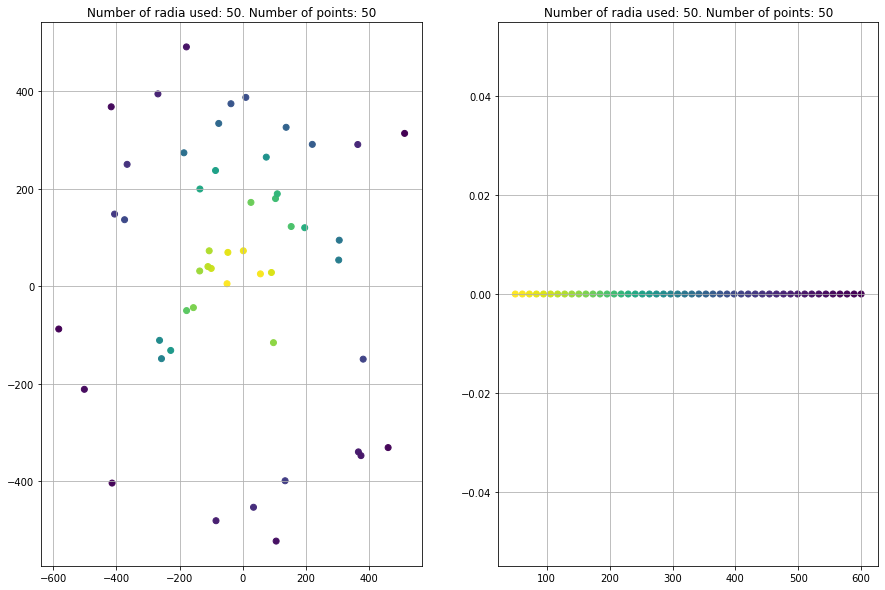

In [4]:
#variables
x0 = 0
y0 = 0

# Point on a circle with the same r
R_circ = 600
n_circ = 50
theta = np.deg2rad(np.linspace(10,360,n_circ))
num_r = 50
r_array_circ = np.linspace(50,R_circ,num_r)

#total number of points is nxn

x_circ = np.array([])
y_circ = np.array([])
z_circ = np.array([])

for item in r_array_circ:
    x_item = item*np.cos(theta)
    y_item = item*np.sin(theta)
    idx = random.sample(range(0,len(x_item)),1)
    x_circ = np.concatenate((x_circ,x_item[idx]))
    y_circ = np.concatenate((y_circ,y_item[idx]))
    r = np.sqrt((x_item**2)+(y_item**2))
    z_circ = np.concatenate((z_circ,zg(R_circ,r)[idx]))

x_line = np.array([])
y_line = np.array([])
z_line = np.array([])

n_line = num_r

phi = np.deg2rad(np.arange(0,90*n_line,90))

for item in r_array_circ:
    x_item = np.array([item]) #*np.cos(phi)
    y_item = np.array([0]) #np.array([0]*len(phi)) #item*np.sin(phi)
    x_line = np.concatenate((x_line,x_item))
    y_line = np.concatenate((y_line,y_item))
    r = np.sqrt((x_item**2)+(y_item**2))
    z_line = np.concatenate((z_line,zg(R_circ,r)))    
    
#plot the figure
fig, ax = plt.subplots(ncols=2,figsize=(15,10))
h = ax[0].scatter(x_circ,y_circ,c=z_circ)

ax[0].set_title(f'Number of radia used: {num_r}. Number of points: {len(x_circ)}')

# fig.colorbar(h,axis=ax[0])
ax[0].grid(True);

h2= ax[1].scatter(x_line,y_line,c=z_line)
ax[1].set_title(f'Number of radia used: {num_r}. Number of points: {len(x_line)}')
ax[1].grid(True);

In [5]:
max_subs = 40
n_sims_circ = 20

assert max_subs < n_circ, 'Not enough initial points to subsample.'

# a = delta_days
# b = x0
# c = y0
# d = max_subs
# e = n_sims_circ
# f = x_circ #x_unravel
# g = y_circ #y_unravel

# #the sinkhole is predefined
# fit_total_save_circ, cond_number_total_save_circ, number_subs_circ = \
# simulate_sinkhole_parameter_retrieval(a,b,c,d,e,f,g,v_wink2016_gaus,R_wink2016_gaus)

obj = simulate_sinkhole()
obj.x0 = x0
obj.y0 = y0
obj.max_subs = max_subs
obj.n_sims = n_sims_circ
obj.x_unravel = x_circ
obj.y_unravel = y_circ

obj.simulate_sinkhole_parameter_retrieval()

Simulating: 100%|██████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.23it/s]


In [6]:
max_subs = 40
n_sims_circ = 20

assert max_subs < n_circ, 'Not enough initial points to subsample.'

# a = delta_days
# b = x0
# c = y0
# d = max_subs
# e = n_sims_circ
# f = x_line #x_unravel
# g = y_line #y_unravel

# #the sinkhole is predefined
# fit_total_save_line, cond_number_total_save_line, number_subs_line = \
# simulate_sinkhole_parameter_retrieval(a,b,c,d,e,f,g,v_wink2016_gaus,R_wink2016_gaus)

obj_line = simulate_sinkhole()
obj_line.x0 = x0
obj_line.y0 = y0
obj_line.max_subs = max_subs
obj_line.n_sims = n_sims_circ
obj_line.x_unravel = x_line
obj_line.y_unravel = y_line

obj_line.simulate_sinkhole_parameter_retrieval()

Simulating:   5%|███▌                                                                   | 1/20 [00:00<00:06,  2.84it/s]H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\case_inverse_kinematic_model.py:64: RuntimeWarning: overflow encountered in matmul
  if dx_hat.T @ Qxhat @ dx_hat < sys.float_info.epsilon:
H:\My Documents\Master_Thesis\Lagrangian_Kinematic_Model\Point_Geometry\Point_Geometry_Package_v2\Point_Geometry_Package\case_inverse_kinematic_model.py:47: RuntimeWarning: overflow encountered in double_scalars
  A2 = ((2*v*t*np.pi*r**2)/(R**3))*zg(R,r)
Simulating: 100%|██████████████████████████████████████████████████████████████████████| 20/20 [00:08<00:00,  2.39it/s]


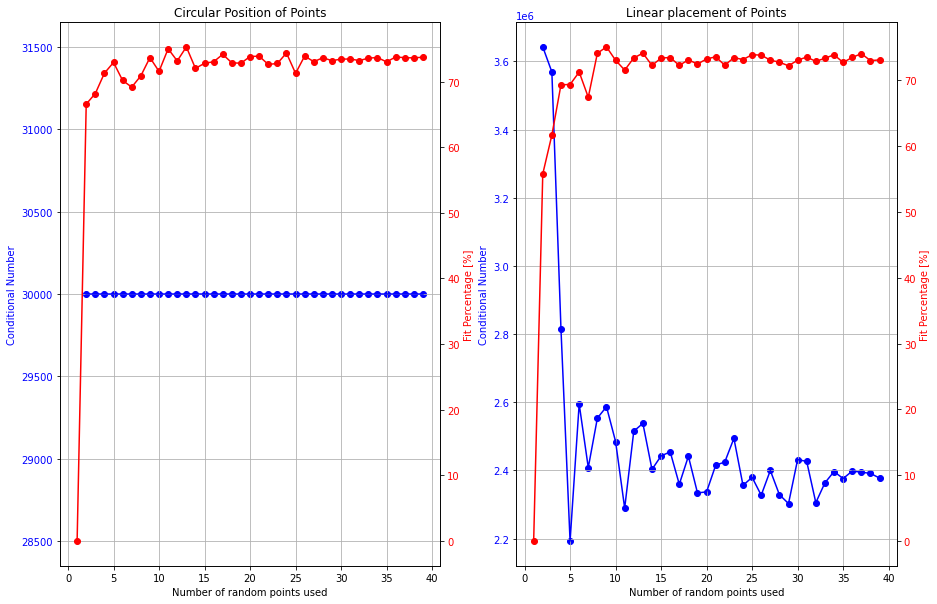

In [12]:
avg_cond_circ = np.median(obj.cond_number_total_save,axis=0)
avg_data_circ = np.sum(obj.fit_total_save,axis=0)/obj.n_sims

ccc = 30000
avg_cond_circ[avg_cond_circ>ccc] = ccc

fig, (ax1,ax3) = plt.subplots(1,2,figsize=(15,10))

ax1.plot(obj.number_subs[1:],avg_cond_circ[1:],c='b',label='Conditional Number')
ax1.scatter(obj.number_subs[1:],avg_cond_circ[1:],c='b')
# ax1.set_title('Median Conditional number and Model Fit Percentage per number of points used.')
ax1.set_title('Circular Position of Points')
ax1.set_ylabel('Conditional Number',color='b')
ax1.set_xlabel('Number of random points used')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

ax2.set_ylabel('Fit Percentage [%]',color='r')
ax2.plot(obj.number_subs,avg_data_circ,c='r',label='Model Fit')
ax2.scatter(obj.number_subs,avg_data_circ,c='r')
ax2.tick_params(axis='y', labelcolor='r')

ax1.grid(True)

# fig.legend()3.grid(True);

#line figures

avg_cond_line = np.median(obj_line.cond_number_total_save,axis=0)
avg_data_line = np.sum(obj_line.fit_total_save,axis=0)/obj_line.n_sims
# avg_cond_line[avg_cond_line>700] = 700

ax3.plot(obj_line.number_subs[1:],avg_cond_line[1:],c='b',label='Conditional Number')
ax3.scatter(obj_line.number_subs[1:],avg_cond_line[1:],c='b')
# ax3.set_title('Median Conditional number and Model Fit Percentage per number of points used.')
ax3.set_title('Linear placement of Points')
ax3.set_ylabel('Conditional Number',color='b')
ax3.set_xlabel('Number of random points used')
ax3.tick_params(axis='y', labelcolor='b')

ax4 = ax3.twinx()

ax4.set_ylabel('Fit Percentage [%]',color='r')
ax4.plot(obj_line.number_subs,avg_data_line,c='r',label='Model Fit')
ax4.scatter(obj_line.number_subs,avg_data_line,c='r')
ax4.tick_params(axis='y', labelcolor='r')

# fig.legend()
ax3.grid(True);

# Conclusion
- The number of different radii is leading for getting the best fit.